In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model
from random import randint
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip drive/"My Drive"/Train.zip

Streaming output truncated to the last 5000 lines.
  inflating: Train/WithMask/Augmented_664_7144901.png  
  inflating: __MACOSX/Train/WithMask/._Augmented_664_7144901.png  
  inflating: Train/WithMask/1479.png  
  inflating: __MACOSX/Train/WithMask/._1479.png  
  inflating: Train/WithMask/Augmented_107_2167235.png  
  inflating: __MACOSX/Train/WithMask/._Augmented_107_2167235.png  
  inflating: Train/WithMask/Augmented_150_763922.png  
  inflating: __MACOSX/Train/WithMask/._Augmented_150_763922.png  
  inflating: Train/WithMask/Augmented_122_32642.png  
  inflating: __MACOSX/Train/WithMask/._Augmented_122_32642.png  
  inflating: Train/WithMask/Augmented_92_7134.png  
  inflating: __MACOSX/Train/WithMask/._Augmented_92_7134.png  
  inflating: Train/WithMask/Augmented_411_223337.png  
  inflating: __MACOSX/Train/WithMask/._Augmented_411_223337.png  
  inflating: Train/WithMask/Augmented_890_9415900.png  
  inflating: __MACOSX/Train/WithMask/._Augmented_890_9415900.png  
  inflating: Tr

In [4]:
!unzip drive/"My Drive"/Test.zip

Archive:  drive/My Drive/Test.zip
   creating: Test/
  inflating: __MACOSX/._Test         
   creating: Test/WithoutMask/
  inflating: __MACOSX/Test/._WithoutMask  
   creating: Test/WithMask/
  inflating: __MACOSX/Test/._WithMask  
  inflating: Test/WithoutMask/2734.png  
  inflating: __MACOSX/Test/WithoutMask/._2734.png  
  inflating: Test/WithoutMask/4345.png  
  inflating: __MACOSX/Test/WithoutMask/._4345.png  
  inflating: Test/WithoutMask/4423.png  
  inflating: __MACOSX/Test/WithoutMask/._4423.png  
  inflating: Test/WithoutMask/2052.png  
  inflating: __MACOSX/Test/WithoutMask/._2052.png  
  inflating: Test/WithoutMask/3364.png  
  inflating: __MACOSX/Test/WithoutMask/._3364.png  
  inflating: Test/WithoutMask/5715.png  
  inflating: __MACOSX/Test/WithoutMask/._5715.png  
  inflating: Test/WithoutMask/1573.png  
  inflating: __MACOSX/Test/WithoutMask/._1573.png  
  inflating: Test/WithoutMask/959.png  
  inflating: __MACOSX/Test/WithoutMask/._959.png  
  inflating: Test/Without

In [5]:
!unzip drive/"My Drive"/Validation.zip

Archive:  drive/My Drive/Validation.zip
   creating: Validation/
  inflating: __MACOSX/._Validation   
   creating: Validation/WithoutMask/
  inflating: __MACOSX/Validation/._WithoutMask  
   creating: Validation/WithMask/
  inflating: __MACOSX/Validation/._WithMask  
  inflating: Validation/WithoutMask/4156.png  
  inflating: __MACOSX/Validation/WithoutMask/._4156.png  
  inflating: Validation/WithoutMask/5248.png  
  inflating: __MACOSX/Validation/WithoutMask/._5248.png  
  inflating: Validation/WithoutMask/2527.png  
  inflating: __MACOSX/Validation/WithoutMask/._2527.png  
  inflating: Validation/WithoutMask/4142.png  
  inflating: __MACOSX/Validation/WithoutMask/._4142.png  
  inflating: Validation/WithoutMask/2533.png  
  inflating: __MACOSX/Validation/WithoutMask/._2533.png  
  inflating: Validation/WithoutMask/1984.png  
  inflating: __MACOSX/Validation/WithoutMask/._1984.png  
  inflating: Validation/WithoutMask/2255.png  
  inflating: __MACOSX/Validation/WithoutMask/._2255.pn

In [6]:
from os import listdir
def read_image_dataset(path, name):  
  listdir()
  train_images_NC=listdir(path)
  plt.figure(figsize=(6,6))
  for i in range(6):
      plt.subplot(3,3,i+1)
      plt.imshow(plt.imread(os.path.join(path,train_images_NC[i])),cmap='gray')
      plt.title(name)
      plt.axis('off')
  plt.show()

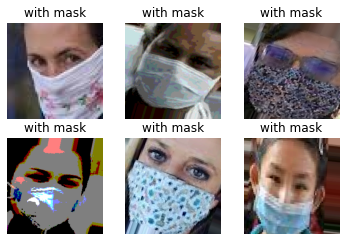

In [7]:
X_train_withmask = read_image_dataset('/content/Train/WithMask', 'with mask')

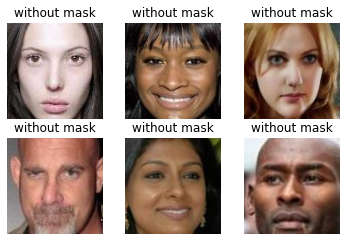

In [8]:
X_train_withoutmask = read_image_dataset('/content/Train/WithoutMask', 'without mask')

In [9]:
total_train_with_mask = len(os.listdir('/content/Train/WithMask'))
total_train_without_mask = len(os.listdir('/content/Train/WithoutMask'))
total_test_with_mask = len(os.listdir('/content/Test/WithoutMask'))
total_test_without_mask = len(os.listdir('/content/Test/WithoutMask'))
total_val_with_mask = len(os.listdir('/content/Validation/WithoutMask'))
total_val_without_mask = len(os.listdir('/content/Validation/WithoutMask'))

print("Train sets images with mask: {}".format(total_train_with_mask))
print("Train sets images without mask: {}".format(total_train_without_mask))
print("Test sets images with mask: {}".format(total_test_with_mask))
print("Test sets images without mask: {}".format(total_test_without_mask))
print("Val sets images with mask: {}".format(total_val_with_mask))
print("Val sets images without mask: {}".format(total_val_without_mask))

Train sets images with mask: 5000
Train sets images without mask: 5000
Test sets images with mask: 509
Test sets images without mask: 509
Val sets images with mask: 400
Val sets images without mask: 400


In [63]:
from pandas.core.series import reshape
from keras_preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator(rescale=1./255)

test_data = ImageDataGenerator(rescale=1./255)

val_data = ImageDataGenerator(rescale=1./255)


In [11]:
def decode_images(data, path):
  set = data.flow_from_directory(
    path,
    target_size=(224,224),
    batch_size=32,
    shuffle = False,
    seed = 42,
    class_mode = "categorical",
    classes = ['WithoutMask','WithMask'])
  return set

In [12]:
train_path='/content/Train'
test_path = '/content/Test'
val_path = '/content/Validation'

In [13]:
train_set = decode_images(train_data, train_path)

Found 10000 images belonging to 2 classes.


In [14]:
test_set = decode_images(test_data, test_path)

Found 992 images belonging to 2 classes.


In [15]:
val_set = decode_images(val_data, val_path)

Found 800 images belonging to 2 classes.


In [16]:
train_set.class_indices

{'WithoutMask': 0, 'WithMask': 1}

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


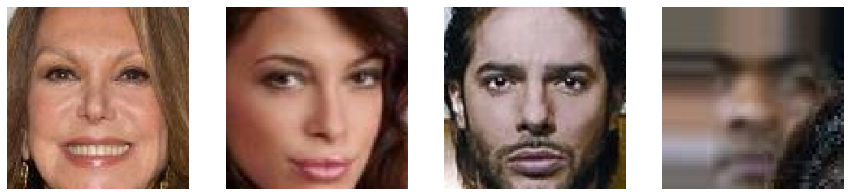

In [17]:
#After processing


fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(4):
  image = next(train_set)[0][0]
  image = np.squeeze(image)
  print(image.shape)
  ax[i].imshow(image)
  ax[i].axis('off')

In [18]:
#Model building
#ResNet50

from keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *


In [19]:
from tensorflow.keras.applications.resnet import ResNet50 

resnet = ResNet50(include_top=False, 
                  weights='imagenet', 
                  input_shape=(224,224,3))

for layer in resnet.layers:
    layer.trainable = False


model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [20]:
checkpoint= tf.keras.callbacks.ModelCheckpoint("my_model", save_best_only= True)
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

In [21]:
resnet_history = model.fit(train_set,epochs=10, batch_size = 1, callbacks= [checkpoint, early_stopping],validation_data=val_set)

Epoch 1/10
313/313 [==============================] - ETA: 0s - loss: 4.3485 - accuracy: 0.5805

313/313 [==============================] - 74s 202ms/step - loss: 4.3485 - accuracy: 0.5805 - val_loss: 2.0438 - val_accuracy: 0.5063
Epoch 2/10
313/313 [==============================] - ETA: 0s - loss: 2.0349 - accuracy: 0.7015

313/313 [==============================] - 59s 189ms/step - loss: 2.0349 - accuracy: 0.7015 - val_loss: 0.5400 - val_accuracy: 0.8288
Epoch 3/10
313/313 [==============================] - 38s 120ms/step - loss: 0.6522 - accuracy: 0.8139 - val_loss: 2.9851 - val_accuracy: 0.5188
Epoch 4/10
313/313 [==============================] - ETA: 0s - loss: 0.5070 - accuracy: 0.8774

313/313 [==============================] - 60s 190ms/step - loss: 0.5070 - accuracy: 0.8774 - val_loss: 0.1959 - val_accuracy: 0.9362
Epoch 5/10
313/313 [==============================] - 37s 119ms/step - loss: 1.9399 - accuracy: 0.8306 - val_loss: 0.4608 - val_accuracy: 0.8562
Epoch 6/10
313/313 [==============================] - ETA: 0s - loss: 0.5840 - accuracy: 0.8616

313/313 [==============================] - 60s 192ms/step - loss: 0.5840 - accuracy: 0.8616 - val_loss: 0.1718 - val_accuracy: 0.9500
Epoch 7/10
313/313 [==============================] - 37s 119ms/step - loss: 0.5496 - accuracy: 0.8744 - val_loss: 0.3258 - val_accuracy: 0.9013
Epoch 8/10
313/313 [==============================] - 38s 121ms/step - loss: 1.3849 - accuracy: 0.8251 - val_loss: 0.3058 - val_accuracy: 0.9225
Epoch 9/10
313/313 [==============================] - 38s 120ms/step - loss: 0.7542 - accuracy: 0.8791 - val_loss: 0.1764 - val_accuracy: 0.9500
Epoch 10/10
313/313 [==============================] - 37s 120ms/step - loss: 0.2190 - accuracy: 0.9374 - val_loss: 0.3739 - val_accuracy: 0.8900


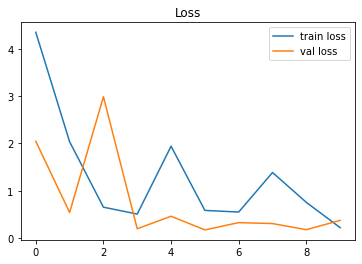

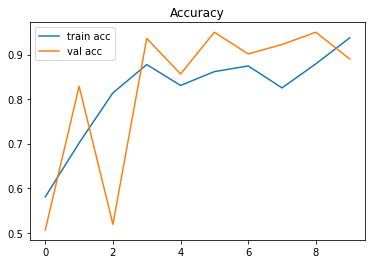

In [22]:
plt.plot(resnet_history.history['loss'], label='train loss')
plt.plot(resnet_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

plt.plot(resnet_history.history['accuracy'], label='train acc')
plt.plot(resnet_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

In [23]:
#Evaluation

resnet_auc = model.evaluate(test_set)

31/31 [==============================] - 3s 110ms/step - loss: 0.3895 - accuracy: 0.8962


In [24]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

31/31 [==============================] - 4s 105ms/step


Text(0.5, 1.0, 'Confusion Matrix - Test Set')

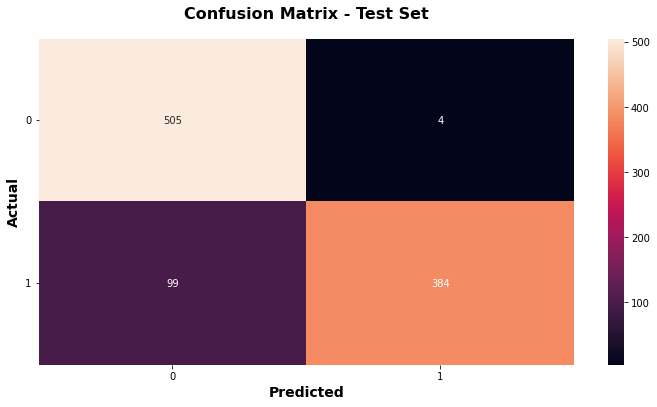

In [25]:
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       509
           1       0.99      0.80      0.88       483

    accuracy                           0.90       992
   macro avg       0.91      0.89      0.89       992
weighted avg       0.91      0.90      0.89       992



In [27]:
#custom CNN

from keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [28]:
model = Sequential()

model.add(layers.Conv2D(64,(3,3),activation='relu',strides=2 ,input_shape=(224,224,3)))
model.add(layers.Conv2D(128,(3,3),activation='relu',strides=2))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32,(3,3),activation='relu',strides=1))
model.add(layers.Conv2D(64,(3,3),activation='relu',strides=1))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2,'softmax'))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 111, 111, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        36896     
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                  

In [29]:
cnn_history = model.fit(train_set,epochs=10,validation_data=val_set)

Epoch 1/10
313/313 [==============================] - 26s 75ms/step - loss: 0.6510 - accuracy: 0.7053 - val_loss: 0.2563 - val_accuracy: 0.8775
Epoch 2/10
313/313 [==============================] - 24s 78ms/step - loss: 0.2297 - accuracy: 0.9216 - val_loss: 0.0946 - val_accuracy: 0.9650
Epoch 3/10
313/313 [==============================] - 23s 74ms/step - loss: 0.1440 - accuracy: 0.9507 - val_loss: 0.1182 - val_accuracy: 0.9712
Epoch 4/10
313/313 [==============================] - 24s 77ms/step - loss: 0.1039 - accuracy: 0.9650 - val_loss: 0.0616 - val_accuracy: 0.9825
Epoch 5/10
313/313 [==============================] - 23s 74ms/step - loss: 0.1217 - accuracy: 0.9585 - val_loss: 0.0692 - val_accuracy: 0.9837
Epoch 6/10
313/313 [==============================] - 24s 77ms/step - loss: 0.0844 - accuracy: 0.9714 - val_loss: 0.0466 - val_accuracy: 0.9862
Epoch 7/10
313/313 [==============================] - 23s 73ms/step - loss: 0.0834 - accuracy: 0.9711 - val_loss: 0.0345 - val_accuracy:

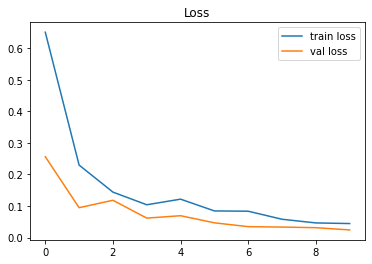

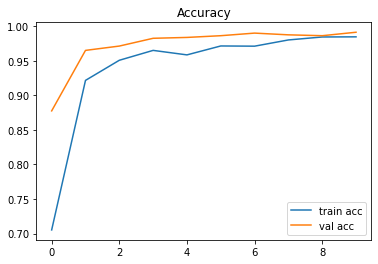

In [30]:
plt.plot(cnn_history.history['loss'], label='train loss')
plt.plot(cnn_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

plt.plot(cnn_history.history['accuracy'], label='train acc')
plt.plot(cnn_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [31]:
#CNN evaluation

cnn_auc = model.evaluate(test_set)

31/31 [==============================] - 2s 64ms/step - loss: 0.0681 - accuracy: 0.9798


In [32]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

31/31 [==============================] - 2s 62ms/step


Text(0.5, 1.0, 'Confusion Matrix - Test Set')

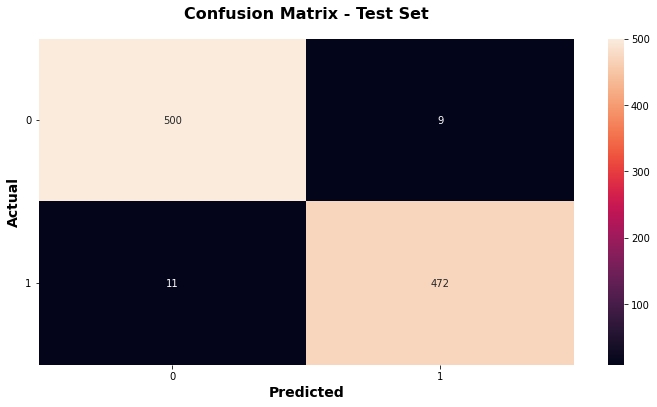

In [33]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       509
           1       0.98      0.98      0.98       483

    accuracy                           0.98       992
   macro avg       0.98      0.98      0.98       992
weighted avg       0.98      0.98      0.98       992



In [76]:
#prediction with CNN
import cv2
def predict(path):

    img = cv2.imread(path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224),interpolation=cv2.INTER_NEAREST)
    plt.axis('off')
    plt.imshow(img)
    img = np.expand_dims(img,axis=0)
    predict = model.predict(img)
    predict = np.argmax(predict,axis = 1)

    if predict == 1:
      print('With Mask')
    else:
      print('No Mask')

1/1 [==============================] - 2s 2s/step
No Mask


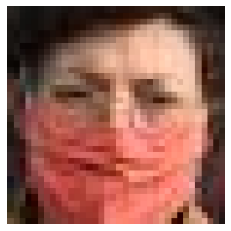

In [77]:
predict('/content/Test/WithMask/1163.png')

1/1 [==============================] - 0s 19ms/step
No Mask


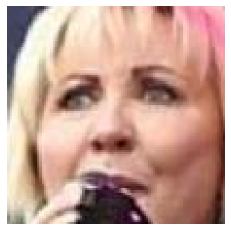

In [37]:
predict('/content/Test/WithoutMask/1000.png')

In [38]:
#GoogleNet

In [66]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

inception = InceptionV3(include_top=False, 
                  weights='imagenet', 
                  input_shape=(224,224,3))

for layer in inception.layers:
    layer.trainable = False


model = Sequential()
model.add(inception)
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

87910968/87910968 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_6 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [67]:
inception_history = model.fit(train_set,epochs=10,validation_data=val_set)

Epoch 1/10
313/313 [==============================] - 45s 126ms/step - loss: 0.4104 - accuracy: 0.9827 - val_loss: 3.4674e-05 - val_accuracy: 1.0000
Epoch 2/10
313/313 [==============================] - 35s 111ms/step - loss: 0.0355 - accuracy: 0.9973 - val_loss: 0.0115 - val_accuracy: 0.9987
Epoch 3/10
313/313 [==============================] - 32s 101ms/step - loss: 0.0141 - accuracy: 0.9984 - val_loss: 0.0036 - val_accuracy: 0.9987
Epoch 4/10
313/313 [==============================] - 33s 105ms/step - loss: 0.0173 - accuracy: 0.9987 - val_loss: 0.0480 - val_accuracy: 0.9987
Epoch 5/10
313/313 [==============================] - 29s 93ms/step - loss: 0.0116 - accuracy: 0.9988 - val_loss: 1.0872e-05 - val_accuracy: 1.0000
Epoch 6/10
313/313 [==============================] - 30s 94ms/step - loss: 0.0130 - accuracy: 0.9986 - val_loss: 0.0149 - val_accuracy: 0.9987
Epoch 7/10
313/313 [==============================] - 29s 92ms/step - loss: 0.0091 - accuracy: 0.9996 - val_loss: 3.1788e-05

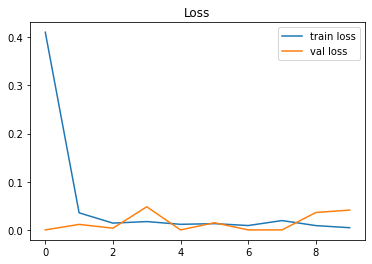

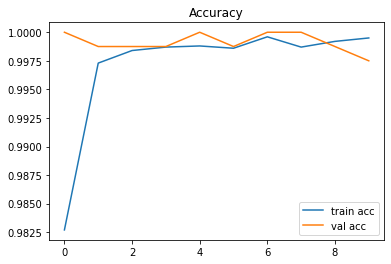

In [68]:
plt.plot(inception_history.history['loss'], label='train loss')
plt.plot(inception_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

plt.plot(inception_history.history['accuracy'], label='train acc')
plt.plot(inception_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [69]:
inception_auc = model.evaluate(test_set)

31/31 [==============================] - 3s 85ms/step - loss: 0.0671 - accuracy: 0.9980


In [70]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

31/31 [==============================] - 4s 81ms/step


Text(0.5, 1.0, 'Confusion Matrix - Test Set')

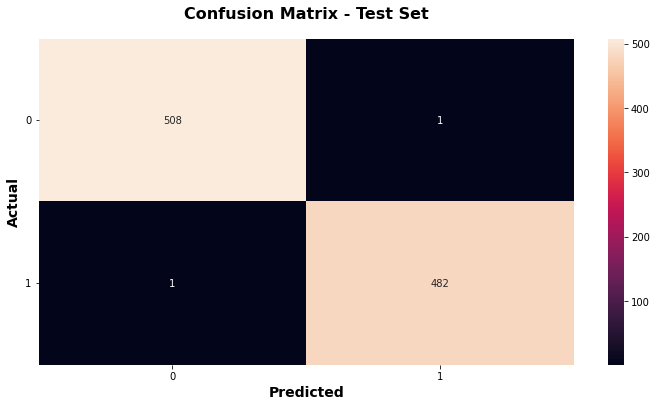

In [71]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [72]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       509
           1       1.00      1.00      1.00       483

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg       1.00      1.00      1.00       992



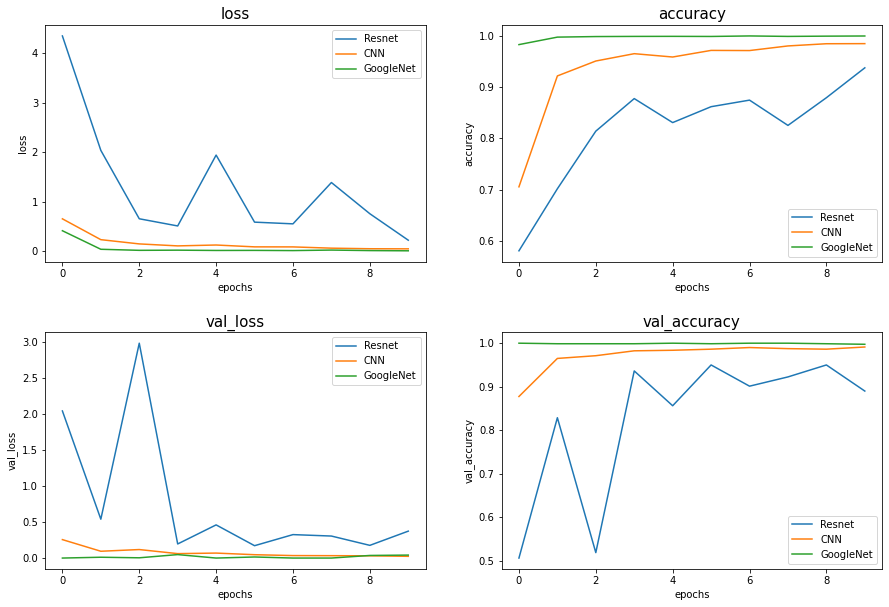

In [79]:
#Comparing all models

model_hist = [resnet_history,cnn_history,inception_history]
names = ['Resnet','CNN', 'GoogleNet']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3)
for metric in model_hist[0].history:
    index = list(model_hist[0].history).index(metric)
    ax = axes.flatten()[index]
    name_index = 0
    for history in model_hist:
        ax.plot(history.history[metric], label=names[name_index])
        name_index += 1
    ax.set_title(metric, size=15)
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.legend()
plt.show()

In [80]:
import pandas as pd
data={'Nets':['Resnet','CNN', 'GoogleNet'],
      'Accuracy':[resnet_auc[1],cnn_auc[1],inception_auc[1]]}

df =pd.DataFrame(data)

df.sort_values('Accuracy', ascending=False)

,Nets,Accuracy
2,GoogleNet,0.997984
1,CNN,0.979839
0,Resnet,0.896169
